In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from src.utils.visualization import plot_histogram

In [2]:
df = pd.read_csv("../data/processed/Energy_Consumption_Processed_01_Cleaned.csv")
df.head()

,Building_Type,Square_Footage,Age_of_Building,Occupancy_Count,Date,Day_of_Week,Month,Time_of_Day,Outdoor_Temperature,HVAC_Usage,Appliance_Usage,Holiday_Flag,Renewable_Energy_%,Weather_Condition,Energy_Consumption_kWh,Peak_Usage_Flag,Temp_vs_Consumption_Ratio,Building_Size_Category,Has_Renewable
0,Residential,2882.727120,1,4.0,2023-08-22,Tuesday,August,Evening,79.102869,High,1,0,18.0,Sunny,250.69,1,3.169164,Medium,1
1,Residential,2397.797732,9,3.0,2023-05-22,Monday,May,Evening,57.242070,Low,1,0,10.0,Cloudy,89.96,0,1.571571,Medium,1
2,Residential,1930.867849,21,5.0,2023-05-25,Thursday,May,Evening,59.906903,Low,1,0,9.0,Cloudy,87.20,0,1.455592,Medium,1
3,Commercial,6696.244285,3,35.0,2023-10-03,Tuesday,October,Day,74.880985,Medium,1,0,0.0,Sunny,377.27,0,5.038262,Large,0
4,Commercial,11818.388089,35,16.0,2023-12-24,Sunday,December,Day,35.136324,High,1,0,0.0,Cloudy,397.68,0,11.318202,Very Large,0


In [3]:
df.columns

Index(['Building_Type', 'Square_Footage', 'Age_of_Building', 'Occupancy_Count',
       'Date', 'Day_of_Week', 'Month', 'Time_of_Day', 'Outdoor_Temperature',
       'HVAC_Usage', 'Appliance_Usage', 'Holiday_Flag', 'Renewable_Energy_%',
       'Weather_Condition', 'Energy_Consumption_kWh', 'Peak_Usage_Flag',
       'Temp_vs_Consumption_Ratio', 'Building_Size_Category', 'Has_Renewable'],
      dtype='object')

In [4]:
df.dtypes

Building_Type                 object
Square_Footage               float64
Age_of_Building                int64
Occupancy_Count              float64
Date                          object
Day_of_Week                   object
Month                         object
Time_of_Day                   object
Outdoor_Temperature          float64
HVAC_Usage                    object
Appliance_Usage                int64
Holiday_Flag                   int64
Renewable_Energy_%           float64
Weather_Condition             object
Energy_Consumption_kWh       float64
Peak_Usage_Flag                int64
Temp_vs_Consumption_Ratio    float64
Building_Size_Category        object
Has_Renewable                  int64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [6]:
# doing the univariate Analysis for column one by one
df['Building_Type'].dtype

dtype('O')

In [7]:
df['Building_Type'].unique()

array(['Residential', 'Commercial'], dtype=object)

In [8]:
type_counts = df['Building_Type'].value_counts()
print(type_counts)

Building_Type
Residential    36099
Commercial     13901
Name: count, dtype: int64


In [9]:
df['Building_Type'].value_counts(normalize=True) * 100

Building_Type
Residential    72.198
Commercial     27.802
Name: proportion, dtype: float64

In [10]:
from src.utils.visualization import plot_categorical_bar

In [11]:
import src.utils.visualization as vis
print("Functions in module:", [f for f in dir(vis) if not f.startswith('_')])

Functions in module: ['plot_categorical_bar', 'plot_histogram', 'plt', 'sns']


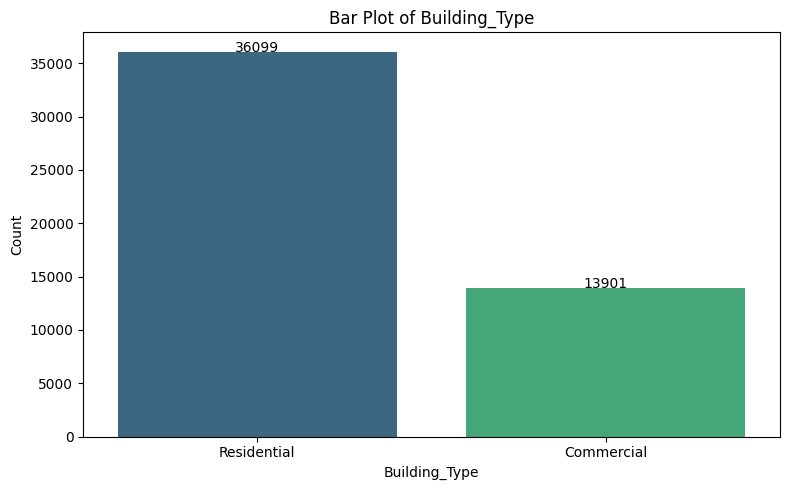

In [12]:
plot_categorical_bar(df,'Building_Type');

In [13]:
# explorign the HVAC usage column 
df['HVAC_Usage'].dtype

dtype('O')

In [14]:
df['HVAC_Usage'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [15]:
type_counts = df['HVAC_Usage'].value_counts()
print(type_counts)

HVAC_Usage
Low       17707
High      17239
Medium    15054
Name: count, dtype: int64


In [16]:
df['HVAC_Usage'].value_counts(normalize=True) * 100

HVAC_Usage
Low       35.414
High      34.478
Medium    30.108
Name: proportion, dtype: float64

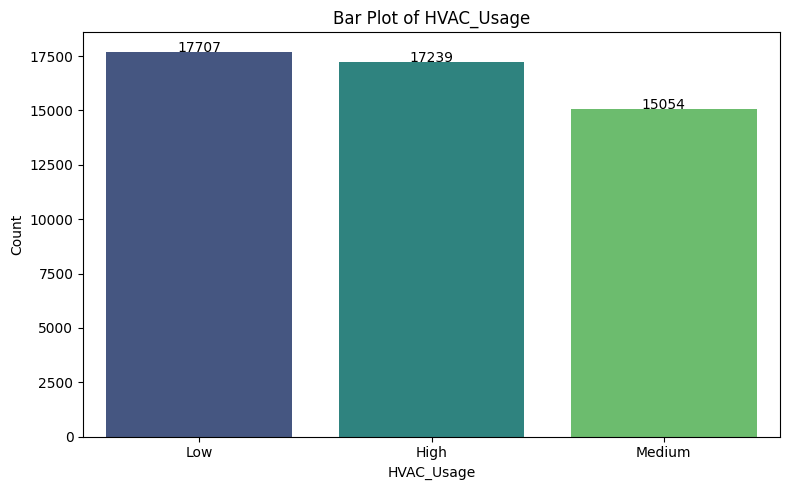

In [17]:
plot_categorical_bar(df,'HVAC_Usage');

In [18]:
# exploring the Weather_Condition 
df['Weather_Condition'].dtype

dtype('O')

In [19]:
df['Weather_Condition'].unique()

array(['Sunny', 'Cloudy', 'Rainy', 'Snowy'], dtype=object)

In [20]:
type_counts = df['Weather_Condition'].value_counts()
print(type_counts)

Weather_Condition
Sunny     20450
Cloudy    14258
Rainy     12367
Snowy      2925
Name: count, dtype: int64


In [21]:
df['Weather_Condition'].value_counts(normalize=True) * 100

Weather_Condition
Sunny     40.900
Cloudy    28.516
Rainy     24.734
Snowy      5.850
Name: proportion, dtype: float64

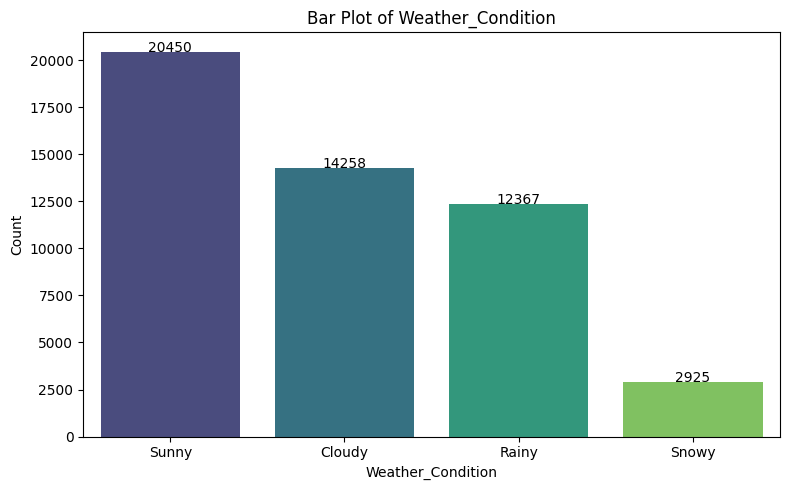

In [22]:
plot_categorical_bar(df,'Weather_Condition');

In [23]:
# exploring the Building_Size_Category column 
df['Building_Size_Category'].dtype

dtype('O')

In [24]:
df['Building_Size_Category'].unique()

array(['Medium', 'Large', 'Very Large', 'Small'], dtype=object)

In [25]:
type_counts = df['Building_Size_Category'].value_counts()
print(type_counts)

Building_Size_Category
Medium        30318
Very Large     7951
Small          6467
Large          5264
Name: count, dtype: int64


In [26]:
df['Building_Size_Category'].value_counts(normalize=True) * 100

Building_Size_Category
Medium        60.636
Very Large    15.902
Small         12.934
Large         10.528
Name: proportion, dtype: float64

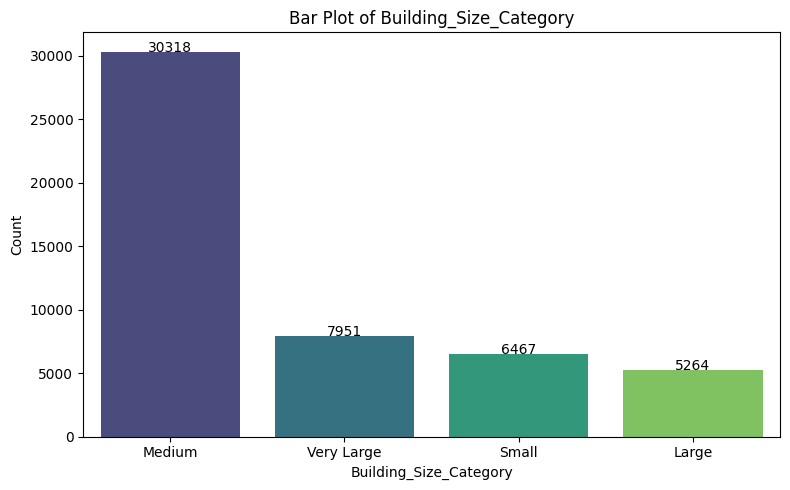

In [27]:
plot_categorical_bar(df, 'Building_Size_Category');

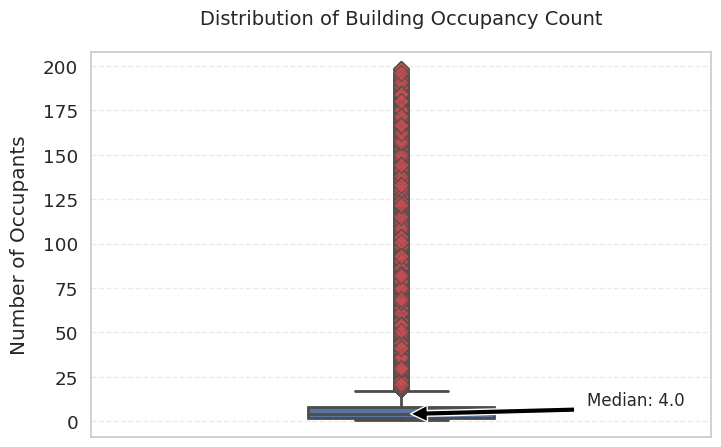

In [28]:
# exploring the data by boxplots 
# Set style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the plot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    y=df['Occupancy_Count'],
    color='#4C72B0',  # Professional blue tone
    width=0.3,
    linewidth=2,
    flierprops={
        'marker': 'D',        # Diamond-shaped outliers
        'markerfacecolor': '#C44E52',  # Complementary red
        'markersize': 8,
        'alpha': 0.7
    }
)

# Enhance aesthetics
plt.title("Distribution of Building Occupancy Count", pad=20, fontsize=14)
plt.ylabel("Number of Occupants", labelpad=10)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# Add median value annotation
median = df['Occupancy_Count'].median()
ax.annotate(f'Median: {median:.1f}', 
            xy=(0, median), 
            xytext=(0.3, median+5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12)

plt.show()

In [29]:
# Identify high-occupancy buildings
high_occ = df[df['Occupancy_Count'] > 75]
print(high_occ[['Building_Type', 'Square_Footage']].describe())

       Square_Footage
count     3873.000000
mean     10511.514391
std       3136.738014
min       4340.415863
25%       8396.750639
50%      10435.612181
75%      12842.319463
max      18203.266477


In [30]:
# Calculate density (occupants per sq ft)
df['Occupancy_Density'] = df['Occupancy_Count'] / df['Square_Footage']

# Handle division by zero (if any)
df['Occupancy_Density'] = df['Occupancy_Density'].replace(np.inf, np.nan)

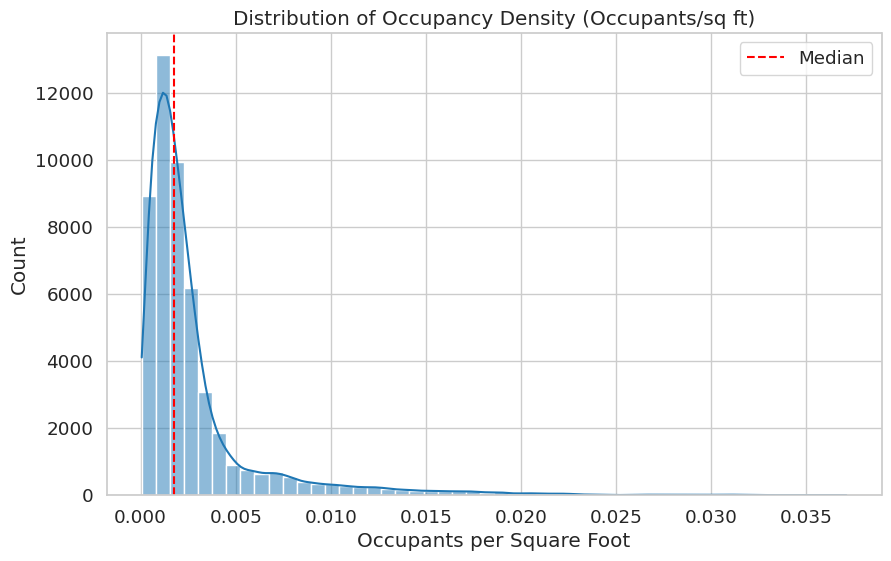

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Occupancy_Density'].dropna(), bins=50, kde=True)
plt.title('Distribution of Occupancy Density (Occupants/sq ft)')
plt.xlabel('Occupants per Square Foot')
plt.axvline(x=df['Occupancy_Density'].median(), color='red', linestyle='--', label='Median')
plt.legend()
plt.show()

In [32]:
# Top 5 most densely occupied buildings
print(df.nlargest(5, 'Occupancy_Density')[['Building_Type', 'Square_Footage', 'Occupancy_Count', 'Occupancy_Density']])

# Statistical summary
print(df['Occupancy_Density'].describe())

      Building_Type  Square_Footage  Occupancy_Count  Occupancy_Density
13658    Commercial     4770.144258            177.0           0.037106
17395    Commercial     4770.144258            177.0           0.037106
18540    Commercial     4770.144258            174.0           0.036477
1209     Commercial     4770.144258            173.0           0.036267
27152    Commercial     4770.144258            173.0           0.036267
count    50000.000000
mean         0.002832
std          0.003584
min          0.000055
25%          0.001019
50%          0.001736
75%          0.002941
max          0.037106
Name: Occupancy_Density, dtype: float64


In [33]:
# Bin by occupancy type
df['Occupancy_Type'] = pd.cut(
    df['Occupancy_Count'],
    bins=[0, 10, 75, np.inf],
    labels=['Low', 'Medium', 'High'],
    right=False
)

Text(0.5, 1.0, 'Energy Efficiency by Occupancy Type')

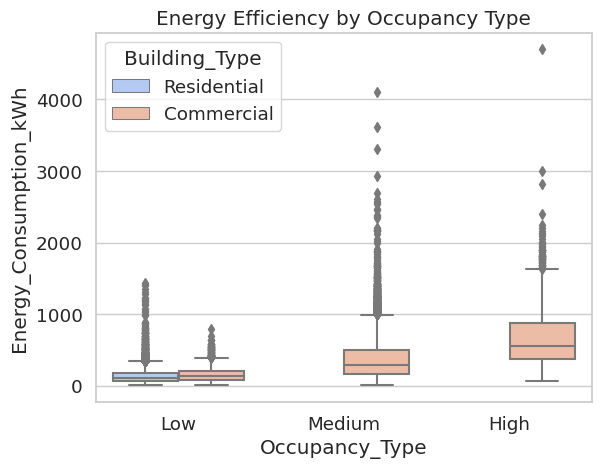

In [34]:
# Compare energy use per sq ft across occupancy types
sns.boxplot(
    data=df,
    x='Occupancy_Type',
    y='Energy_Consumption_kWh',
    hue='Building_Type',
    palette='coolwarm'
)
plt.title('Energy Efficiency by Occupancy Type')

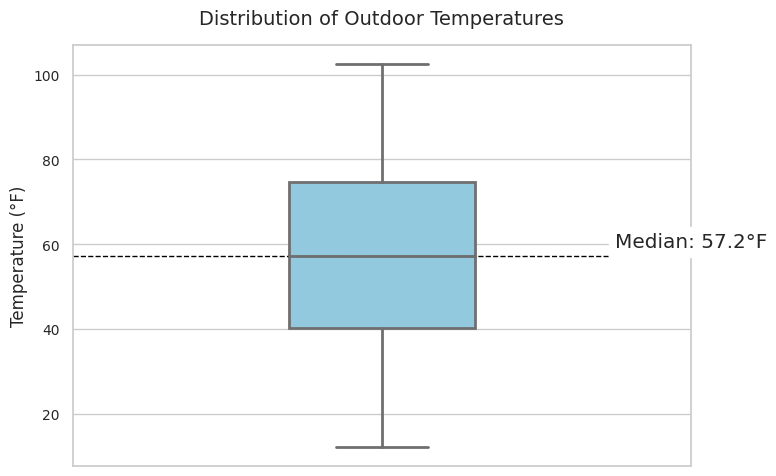

In [35]:

# Set style
sns.set_style("whitegrid")
# Create boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    y=df['Outdoor_Temperature'],
    color='skyblue',
    width=0.3,
    linewidth=2,
    flierprops={
        'marker': 'o',
        'markerfacecolor': 'red',
        'markersize': 5,
        'alpha': 0.5
    }
)


plt.title("Distribution of Outdoor Temperatures", fontsize=14, pad=15)
plt.ylabel("Temperature (°F)", fontsize=12)
plt.yticks(fontsize=10)

# Add median line
median_temp = df['Outdoor_Temperature'].median()
plt.axhline(y=median_temp, color='black', linestyle='--', linewidth=1)
plt.text(
    x=0.5, 
    y=median_temp+2, 
    s=f'Median: {median_temp:.1f}°F', 
    ha='center',
    backgroundcolor='white'
)

plt.tight_layout()
plt.show()

In [36]:
print("hello")

hello


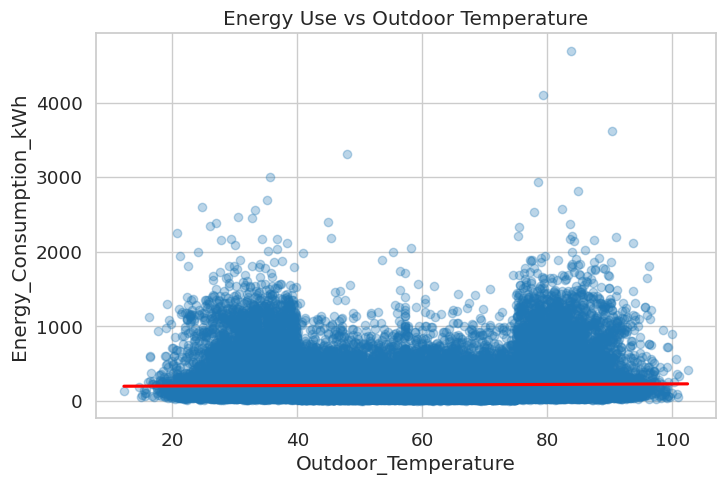

In [37]:
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='Outdoor_Temperature',
    y='Energy_Consumption_kWh',
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title("Energy Use vs Outdoor Temperature")
plt.show()

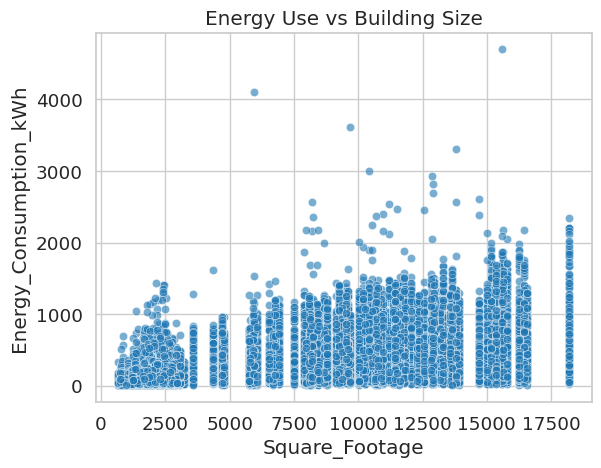

In [38]:
sns.scatterplot(data=df, x='Square_Footage', y='Energy_Consumption_kWh', alpha=0.6)
plt.title('Energy Use vs Building Size')
plt.show()

In [39]:
df.columns

Index(['Building_Type', 'Square_Footage', 'Age_of_Building', 'Occupancy_Count',
       'Date', 'Day_of_Week', 'Month', 'Time_of_Day', 'Outdoor_Temperature',
       'HVAC_Usage', 'Appliance_Usage', 'Holiday_Flag', 'Renewable_Energy_%',
       'Weather_Condition', 'Energy_Consumption_kWh', 'Peak_Usage_Flag',
       'Temp_vs_Consumption_Ratio', 'Building_Size_Category', 'Has_Renewable',
       'Occupancy_Density', 'Occupancy_Type'],
      dtype='object')

In [40]:
df['Building_Size_Category'].unique()

array(['Medium', 'Large', 'Very Large', 'Small'], dtype=object)

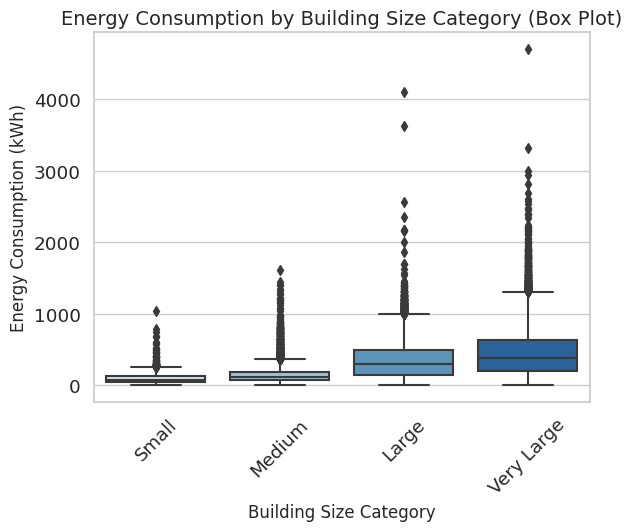

In [41]:
sns.boxplot(x='Building_Size_Category', y='Energy_Consumption_kWh', 
            data=df, 
            order=['Small', 'Medium', 'Large', 'Very Large'],
            palette='Blues')
plt.title('Energy Consumption by Building Size Category (Box Plot)', fontsize=14)
plt.xlabel('Building Size Category', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.xticks(rotation=45);

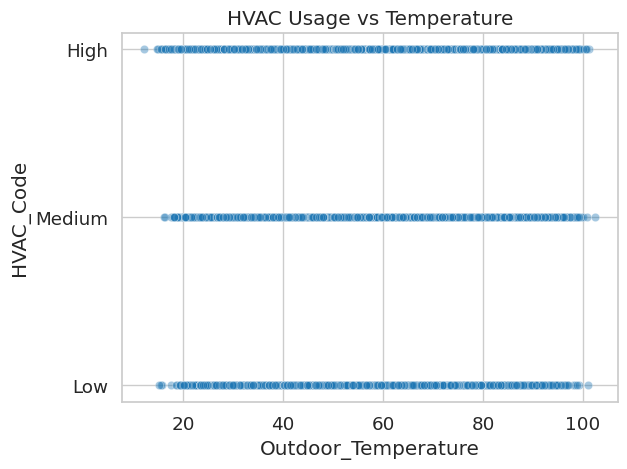

In [42]:
# First encode HVAC numerically
df['HVAC_Code'] = df['HVAC_Usage'].map({'Low':0, 'Medium':1, 'High':2})
sns.scatterplot(data=df, x='Outdoor_Temperature', y='HVAC_Code', alpha=0.4)
plt.yticks([0,1,2], ['Low','Medium','High'])
plt.title('HVAC Usage vs Temperature')
plt.show()

In [47]:

anomalies = df[((df['Outdoor_Temperature'] < 50) & (df['HVAC_Usage'] == 'Low')) | 
               ((df['Outdoor_Temperature'] > 70) & (df['HVAC_Usage'] == 'Low'))]
print(anomalies[['Building_Type', 'Square_Footage']].describe())

       Square_Footage
count     9432.000000
mean      4353.320374
std       4180.864781
min        672.411976
25%       1880.202746
50%       2301.720613
75%       5929.643547
max      18203.266477


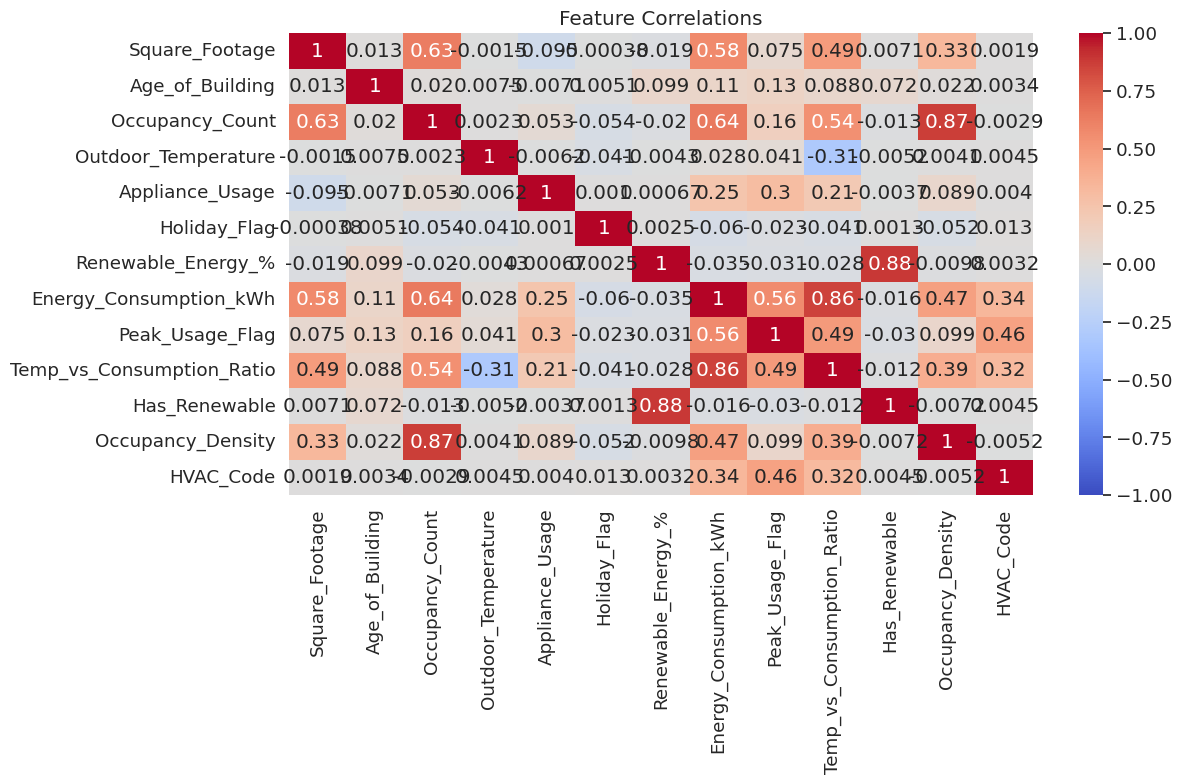

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlations')
plt.show()

/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


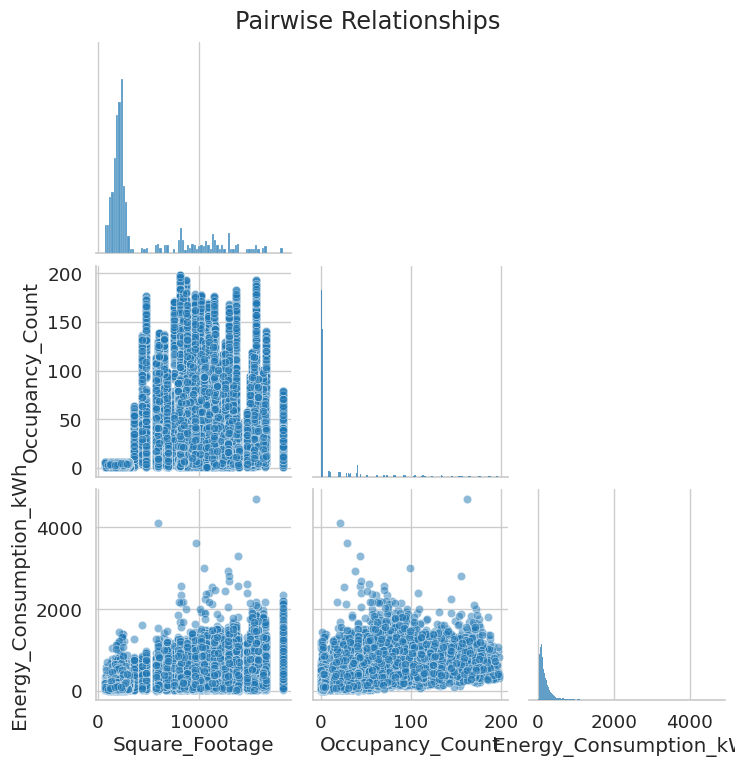

In [51]:
sns.pairplot(df[['Square_Footage', 'Occupancy_Count', 'Energy_Consumption_kWh']],
             corner=True, plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [52]:
df.columns

Index(['Building_Type', 'Square_Footage', 'Age_of_Building', 'Occupancy_Count',
       'Date', 'Day_of_Week', 'Month', 'Time_of_Day', 'Outdoor_Temperature',
       'HVAC_Usage', 'Appliance_Usage', 'Holiday_Flag', 'Renewable_Energy_%',
       'Weather_Condition', 'Energy_Consumption_kWh', 'Peak_Usage_Flag',
       'Temp_vs_Consumption_Ratio', 'Building_Size_Category', 'Has_Renewable',
       'Occupancy_Density', 'Occupancy_Type', 'HVAC_Code'],
      dtype='object')

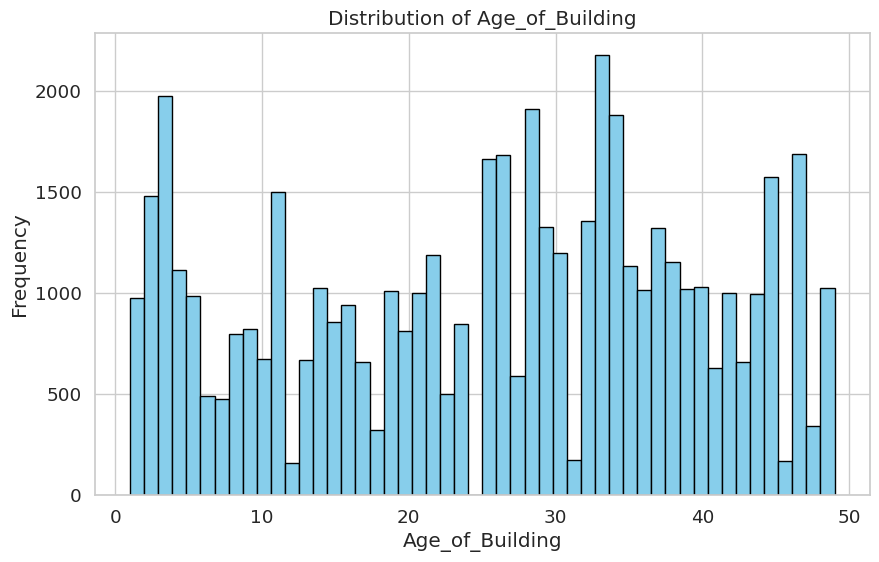

In [53]:
plot_histogram(df, 'Age_of_Building');

In [54]:
df['Age_of_Building'].dtype

dtype('int64')

Text(0, 0.5, 'Energy Consumption (kWh)')

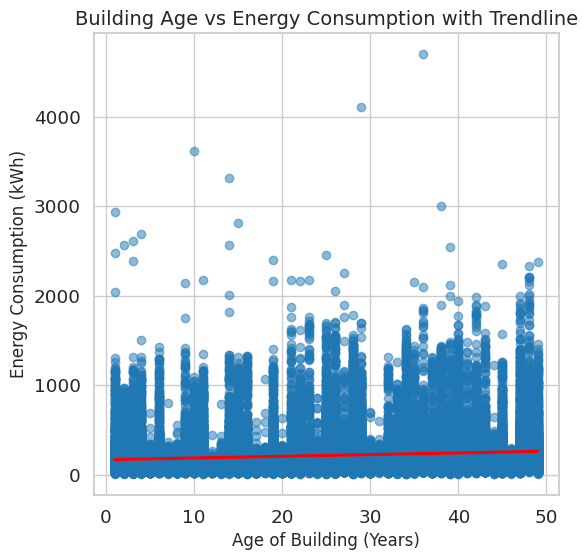

In [57]:
plt.figure(figsize=(6,6))
sns.regplot(x='Age_of_Building', y='Energy_Consumption_kWh', 
            data=df, 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color':'red'})
plt.title('Building Age vs Energy Consumption with Trendline', fontsize=14)
plt.xlabel('Age of Building (Years)', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)

In [58]:
# saving this processed df to csv file for further analysis 
df.to_csv('../data/processed/Energy_Consumption_Processed_02_Cleaned_with_more_features.csv', index=False) # Excludes row indices